In [66]:
import numpy as np
import matplotlib.pyplot as plt
import random, math

In [50]:
def Ising_Mertopolis(T,L):

  N = L * L
  nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}
  nsteps = 1000000

  Res = []
  beta = 1.0 / T

  for i in range(3):

    S = [random.choice([1, -1]) for k in range(N)]

    for step in range(nsteps):
      k = random.randint(0, N - 1)
      delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
      if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
          S[k] *= -1

    Res.append(S)

  return Res

In [3]:
def kron(a,b):
  if a==b:
    return 1
  else: 
    return 0

In [4]:
def mod2(a,b):
  for i in range(b):
    if a+1<=2:
      a=a+1
    else:
      a = 0
  return a

In [70]:
def Potts_Metropolis(T,L):

  N = L * L
  nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}
  nsteps = 1000000
  
  Res=[]
  beta = 1.0 / T

  for i in range(3):

    S = [random.choice([0,1,2]) for k in range(N)]

    for step in range(nsteps):
      k = random.randint(0, N - 1)
      S_new = mod2( S[k], random.choice([1,2]))
      delta_E = - sum( kron(S_new , S[nn]) for nn in nbr[k] ) + sum( kron(S[k] , S[nn]) for nn in nbr[k] ) 
      if delta_E < 0 or random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
          S[k] = S_new

    Res.append(S)

  return Res

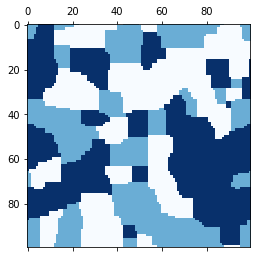

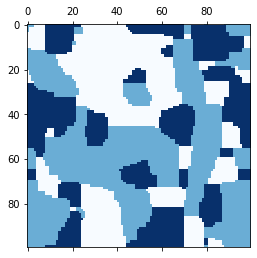

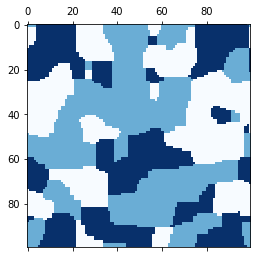

In [77]:
B = Potts_Metropolis(0.05,100)

for i in range(3): 
  R = np.reshape(B[i],(L,L))
  plt.matshow(R,  cmap = 'Blues')

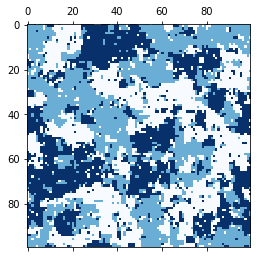

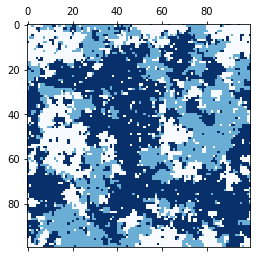

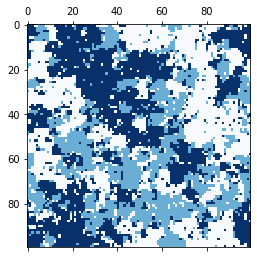

In [65]:
B = Potts_Metropolis(1,100)

for i in range(3): 
  R = np.reshape(B[i],(L,L))
  plt.matshow(R,  cmap = 'Blues')

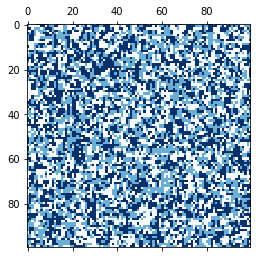

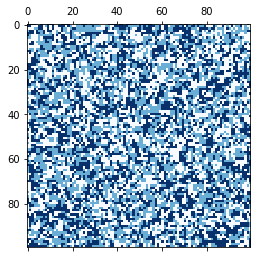

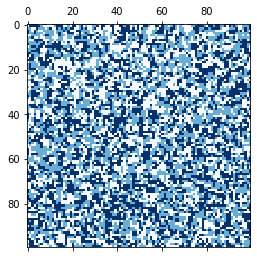

In [74]:
B = Potts_Metropolis(2.2,100)

for i in range(3): 
  R = np.reshape(B[i],(L,L))
  plt.matshow(R,  cmap = 'Blues')

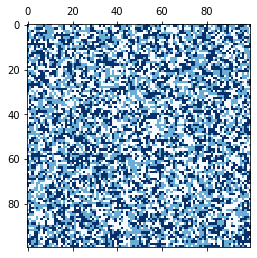

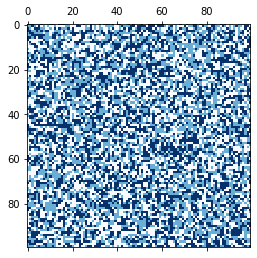

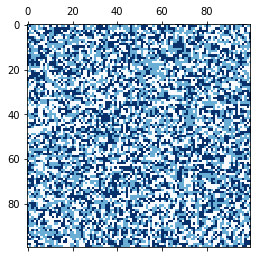

In [72]:
B = Potts_Metropolis(4,100)

for i in range(3): 
  R = np.reshape(B[i],(L,L))
  plt.matshow(R,  cmap = 'Blues')

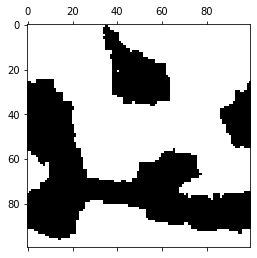

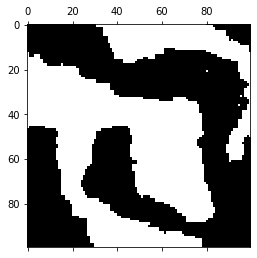

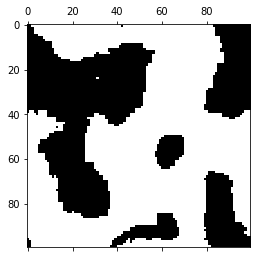

In [53]:
A = Ising_Mertopolis(1,100)
for i in range(3):
  R = np.reshape(A[i],(L,L))
  plt.matshow(R,  cmap = 'Greys')

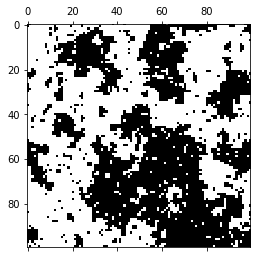

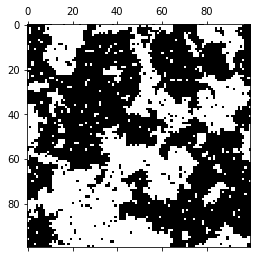

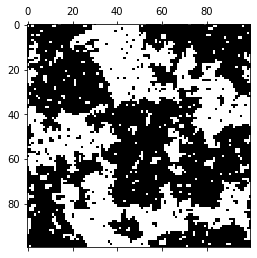

In [75]:
A = Ising_Mertopolis(2.2,100)
for i in range(3):
  R = np.reshape(A[i],(L,L))
  plt.matshow(R,  cmap = 'Greys')

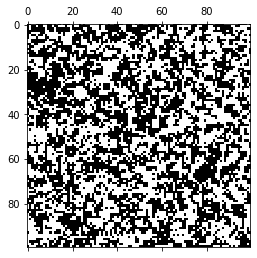

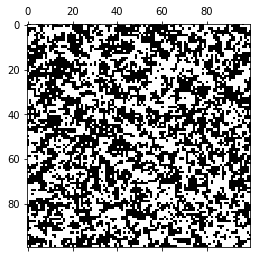

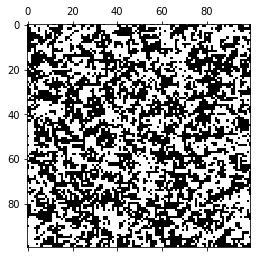

In [76]:
A = Ising_Mertopolis(4,100)
for i in range(3):
  R = np.reshape(A[i],(L,L))
  plt.matshow(R,  cmap = 'Greys')